In [34]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# $6 * 9 / 6 * 3 * 7 * 3$	1 2 3 4 5 6 7 8 9 10	10	2

In [35]:
seq = '6∗9/6∗3∗7∗3'
seq_len = len(seq)
seq_len

11

In [36]:
syn_dis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
len(syn_dis)

10

In [37]:
prob_action = {i:[] for i in range(seq_len)}
mem = {i:[] for i in range(seq_len)}

In [38]:
i = 0
with open('feval-analy_d10_mono-sarnn.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'all' not in line_json:
            continue
        
        prob_action[i].append(line_json['all'])
        mem[i].append(line_json['mem'])
        i += 1
        i %= seq_len

In [39]:
len(prob_action[0])

1366

([], <a list of 0 Text yticklabel objects>)

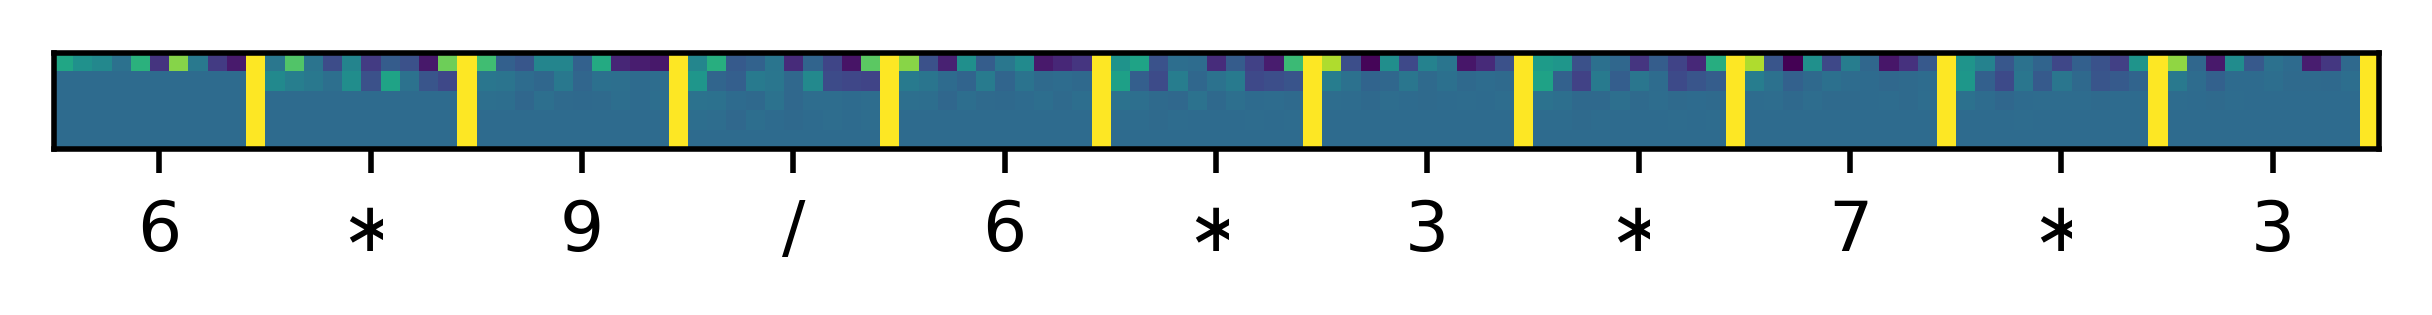

In [41]:
remain = 10
step = []
for i in range(seq_len):
    step.append(np.array(mem[i]))
mean_mem_dist = []
for i in range(seq_len):
    mean_mem_dist.append((step[i].sum(0)/step[i].shape[0])[:, :remain])

for i in range(seq_len):
    mean_mem_dist[i] = np.hstack([mean_mem_dist[i], np.ones((5, 1))])
mem_whole = np.hstack(mean_mem_dist)

fig, ax = plt.subplots()
fig.dpi = 500
plt.imshow(mem_whole)
plt.xticks(np.arange(5, mem_whole.shape[1], 11), list(seq))
plt.yticks([])

# l/r : fraction of gates that are left/right saturated

In [8]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0

In [9]:
i = 0
with open('feval-analy_d10_mono-sarnn_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [10]:
ngates = ngates/seq_len

In [11]:
ngates

136600.0

In [12]:
step = []
for i in range(seq_len):
    step.append(np.array(prob_action[i]))

In [13]:
mean_dist = []
for i in range(seq_len):
    mean_dist.append(step[i].sum(0)/step[i].shape[0])

In [14]:
mean_dist[0]

array([3.27666903e-01, 1.91020787e-01, 2.42054760e-01, 5.60695788e-02,
       2.47078089e-02, 3.90318290e-02, 2.21719067e-04, 7.97231646e-02,
       7.92264363e-03, 7.11325887e-03, 1.61584802e-03, 2.28516960e-02])

in_l: 0.39838945827232797
in_r: 0.23005856515373352
forget_l: 0.45575402635431916
forget_r: 0.16396046852122986
out_l: 0.44476573938506586
out_r: 0.17176427525622254


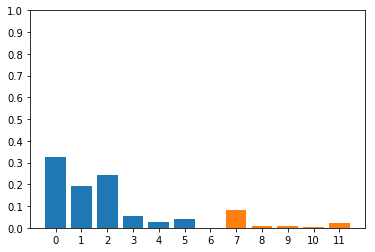

In [15]:
plt.bar(np.arange(6), mean_dist[0][:6])
plt.bar(np.arange(6, 12), mean_dist[0][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[0]/ngates)
print('in_r:', in_r[0]/ngates)
print('forget_l:', forget_l[0]/ngates)
print('forget_r:', forget_r[0]/ngates)
print('out_l:', out_l[0]/ngates)
print('out_r:', out_r[0]/ngates)

in_l: 0.6176793557833089
in_r: 0.28390922401171304
forget_l: 0.5238286969253294
forget_r: 0.35567349926793557
out_l: 0.5466178623718887
out_r: 0.33103953147877013


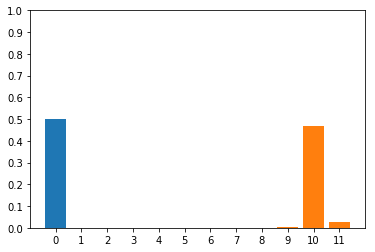

In [16]:
plt.bar(np.arange(6), mean_dist[1][:6])
plt.bar(np.arange(6, 12), mean_dist[1][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[1]/ngates)
print('in_r:', in_r[1]/ngates)
print('forget_l:', forget_l[1]/ngates)
print('forget_r:', forget_r[1]/ngates)
print('out_l:', out_l[1]/ngates)
print('out_r:', out_r[1]/ngates)

in_l: 0.6120424597364568
in_r: 0.18258418740849194
forget_l: 0.43747437774524156
forget_r: 0.3024450951683748
out_l: 0.47338213762811127
out_r: 0.2748316251830161


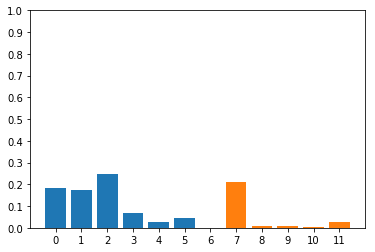

In [17]:
plt.bar(np.arange(6), mean_dist[2][:6])
plt.bar(np.arange(6, 12), mean_dist[2][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[2]/ngates)
print('in_r:', in_r[2]/ngates)
print('forget_l:', forget_l[2]/ngates)
print('forget_r:', forget_r[2]/ngates)
print('out_l:', out_l[2]/ngates)
print('out_r:', out_r[2]/ngates)

in_l: 0.6297584187408491
in_r: 0.27079795021961933
forget_l: 0.5430234260614935
forget_r: 0.3194875549048316
out_l: 0.5588726207906296
out_r: 0.3192972181551977


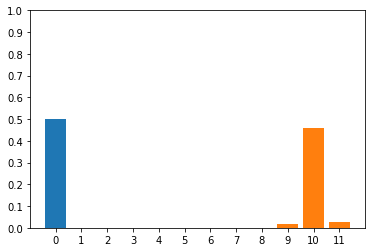

In [18]:
plt.bar(np.arange(6), mean_dist[3][:6])
plt.bar(np.arange(6, 12), mean_dist[3][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[3]/ngates)
print('in_r:', in_r[3]/ngates)
print('forget_l:', forget_l[3]/ngates)
print('forget_r:', forget_r[3]/ngates)
print('out_l:', out_l[3]/ngates)
print('out_r:', out_r[3]/ngates)

in_l: 0.6069619326500733
in_r: 0.17784773060029282
forget_l: 0.44657393850658855
forget_r: 0.29289165446559295
out_l: 0.48126647144948753
out_r: 0.2630161054172767


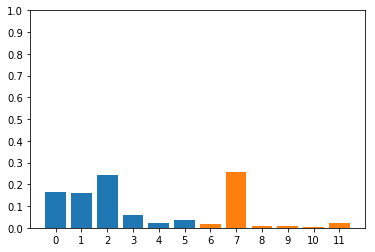

In [19]:
plt.bar(np.arange(6), mean_dist[4][:6])
plt.bar(np.arange(6, 12), mean_dist[4][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[4]/ngates)
print('in_r:', in_r[4]/ngates)
print('forget_l:', forget_l[4]/ngates)
print('forget_r:', forget_r[4]/ngates)
print('out_l:', out_l[4]/ngates)
print('out_r:', out_r[4]/ngates)

in_l: 0.6307027818448023
in_r: 0.26923865300146416
forget_l: 0.5551830161054173
forget_r: 0.30880673499267935
out_l: 0.5583016105417277
out_r: 0.321896046852123


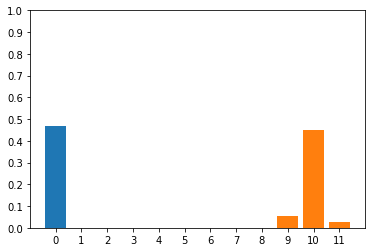

In [20]:
plt.bar(np.arange(6), mean_dist[5][:6])
plt.bar(np.arange(6, 12), mean_dist[5][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[5]/ngates)
print('in_r:', in_r[5]/ngates)
print('forget_l:', forget_l[5]/ngates)
print('forget_r:', forget_r[5]/ngates)
print('out_l:', out_l[5]/ngates)
print('out_r:', out_r[5]/ngates)

in_l: 0.5991874084919473
in_r: 0.1791727672035139
forget_l: 0.45111273792093703
forget_r: 0.29043191800878476
out_l: 0.4813836017569546
out_r: 0.2602562225475842


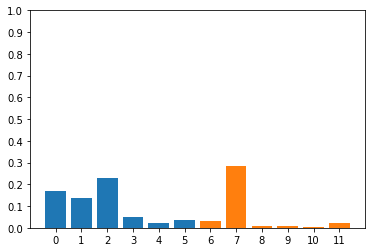

In [21]:
t=6
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6134260614934114
in_r: 0.28912152269399705
forget_l: 0.5842459736456809
forget_r: 0.282796486090776
out_l: 0.5473133235724744
out_r: 0.33218155197657395


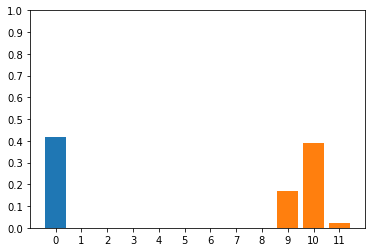

In [22]:
t=7
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.5756734992679355
in_r: 0.19281844802342607
forget_l: 0.47232064421669107
forget_r: 0.2719692532942899
out_l: 0.4890409956076135
out_r: 0.24989751098096633


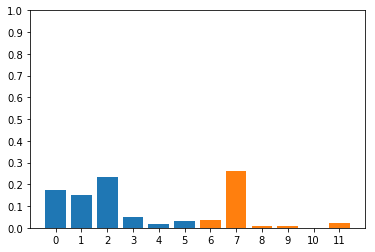

In [23]:
t=8
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.5645387994143485
in_r: 0.34078330893118597
forget_l: 0.6504319180087847
forget_r: 0.23076134699853587
out_l: 0.5074231332357247
out_r: 0.3701024890190337


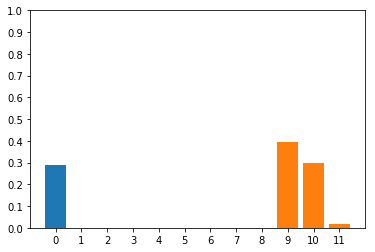

In [24]:
t=9
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.5210322108345534
in_r: 0.21964128843338213
forget_l: 0.5071815519765739
forget_r: 0.2413103953147877
out_l: 0.4977232796486091
out_r: 0.22637628111273791


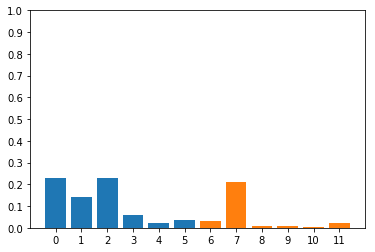

In [25]:
t=10
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

In [26]:
push = [mean_dist[t][:6].sum() for t in range(seq_len)]

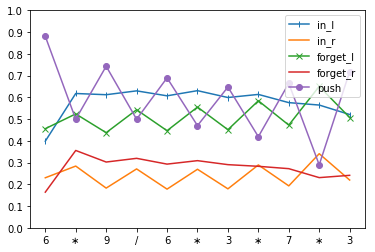

In [27]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

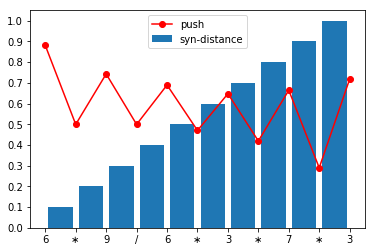

In [28]:
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o', color='red')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance')
plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()